<h1><b>Dengue Cases in the Philippines</b></h1>
<hr>
<h4> Student:  John Marc De Villa </h4>
<h4> Year&Section: BSIT- 3A </h4>

<br>
<img src='https://www.cdc.gov/dengue/media/images/transmissionthumbnail_1.jpg'>

In [105]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [106]:
dengue_ph = pd.read_csv('/content/dengue.csv')


In [107]:
dengue_ph

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [108]:
dengue_ph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [109]:
dengue_ph['Month'] = dengue_ph['Month'].astype('category')
dengue_ph['Year'] = dengue_ph['Year'].astype('category')
dengue_ph['Region'] = dengue_ph['Region'].astype('category')

In [110]:
dengue_ph.dtypes

,0
Month,category
Year,category
Region,category
Dengue_Cases,int64
Dengue_Deaths,int64


In [111]:
dengue_ph['Region'].unique()

['Region I', 'Region II', 'Region III', 'Region IV-A', 'Region IV-B', ..., 'Region XII', 'Region XIII', 'NCR', 'CAR', 'BARMM']
Length: 17
Categories (17, object): ['BARMM', 'CAR', 'NCR', 'Region I', ..., 'Region X', 'Region XI',
                          'Region XII', 'Region XIII']

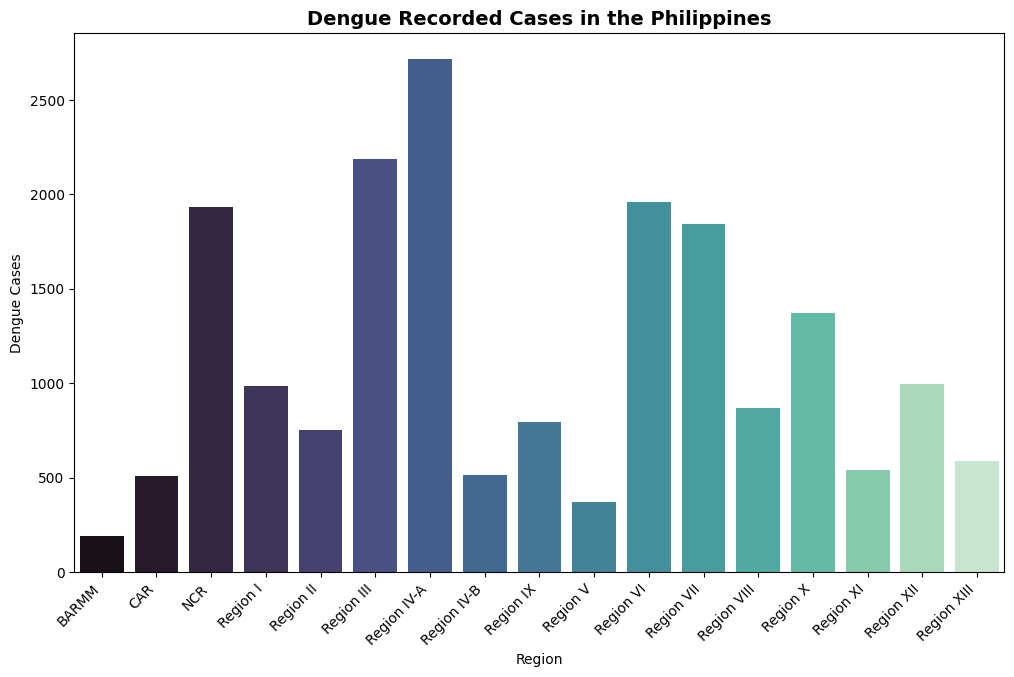

In [112]:
plt.figure(figsize=(12,7))
sns.barplot(
    data=dengue_ph,
    x='Region',
    y='Dengue_Cases',
    palette='mako',
    errorbar=None
)

plt.xlabel('Region')
plt.ylabel('Dengue Cases')
plt.title('Dengue Recorded Cases in the Philippines', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

<ul>
<h1><b><li>Insights</li></b></h1>

<ol start = 1><li><p>The graph shows the number of <b>dengue cases</b> in different regions of the <b>Philippines. Region IV-A (CALABARZON)</b> has the <i>most recorded cases</i>, followed by <b>Region III (Central Luzon) and Region VII (Central Visayas)</b>. On the other hand, <b>BARMM and Region IX</b> have the <i>fewest cases</i>.</li>
</ol>
</p>

In [113]:
NCR_dengue = dengue_ph[dengue_ph['Region'] == 'NCR']


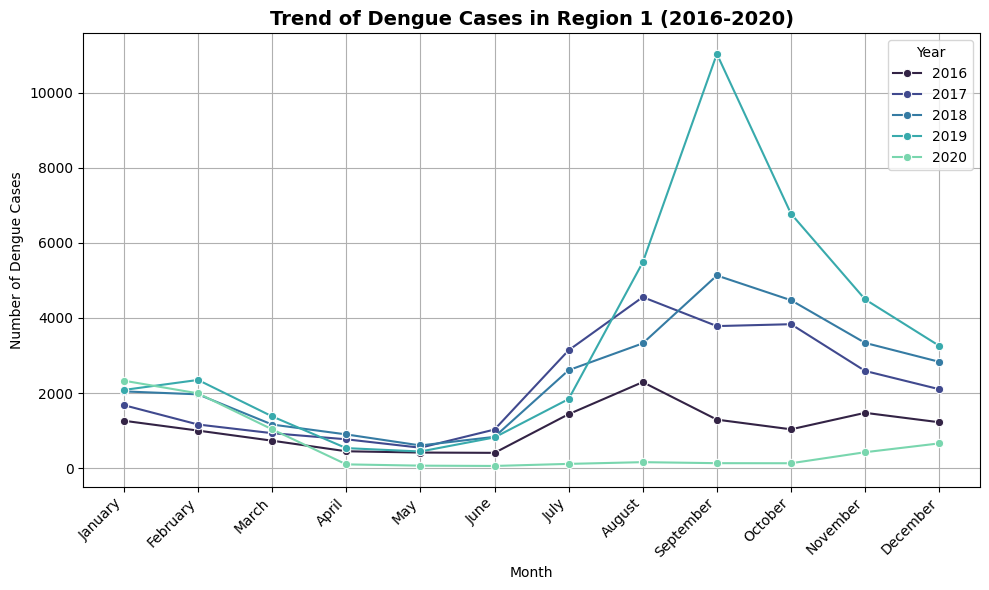

In [114]:
month_order = ['January','February','March','April', 'May','June', 'July',
               'August', 'September', 'October', 'November', 'December']

NCR_dengue['Month'] = pd.Categorical(NCR_dengue['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(10,6))
sns.lineplot(x = 'Month', y = 'Dengue_Cases', hue = 'Year', data = NCR_dengue, marker ='o',palette="mako")
plt.title('Trend of Dengue Cases in Region 1 (2016-2020)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<ul>
<h1><b><li>Insights</li></b></h1>

<ol start = 2><li><p>The graph shows the <b>trend of dengue cases in Region 1 from 2016 to 2020</b>. Dengue cases usually increase from <b>July to September</b>, with <b>September 2019</b> having the <b>highest number of cases</b>. After that, the numbers go down toward the end of the year.</i></li>
</p></ol>

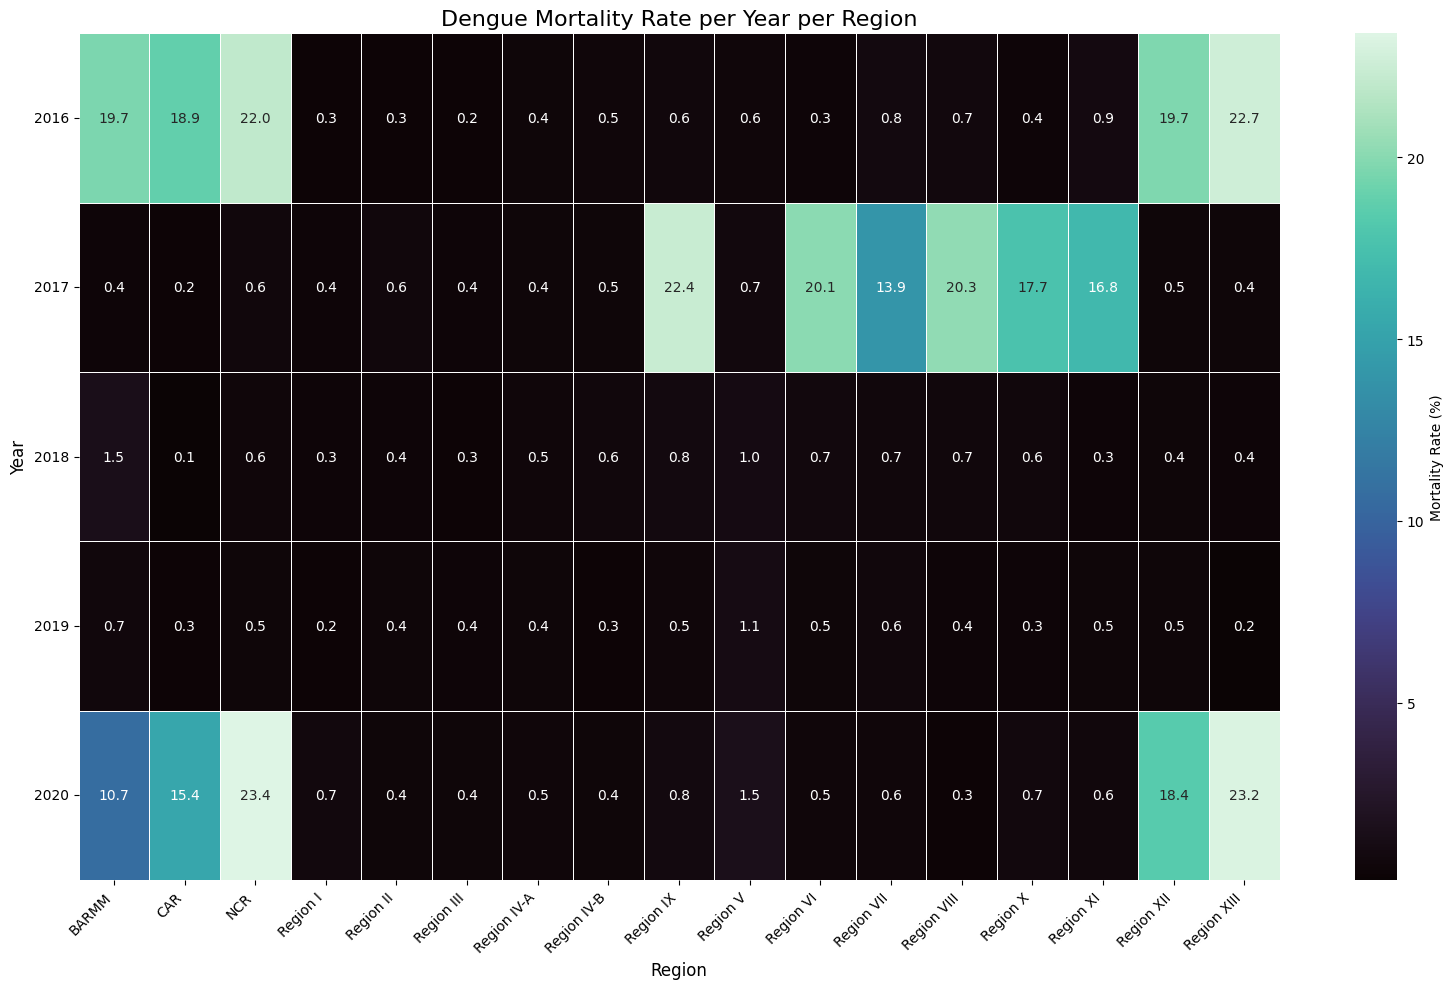

In [115]:
dengue_ph['Mortality_Rate'] = (dengue_ph['Dengue_Deaths'] / dengue_ph['Dengue_Cases']) * 100

heatmap_data = dengue_ph.groupby(['Year', 'Region'])['Mortality_Rate'].mean().unstack()


plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap="mako", linewidths=.5, cbar_kws={'label': 'Mortality Rate (%)'})
plt.title('Dengue Mortality Rate per Year per Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Year', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

<ul>
<h1><b><li>Insights</li></b></h1>

<ol start = 3><li><p> The graph shows that <b>NCR, CAR, and Region XIII</b> had some of the <b>highest dengue mortality rates</b> in certain years, especially in <b>2016, 2017, and 2020</b>. This means more people who got dengue in these areas died compared to other regions.</i>
</li>
<li>In contrast, most other regions had <b>low mortality rates</b> across all years, showing <b>better control or treatment</b> of dengue cases. The data suggests that <b>health care and prevention efforts</b> should be focused more on regions with higher death rates.</li>
</ol>
</p>

In [116]:
NCR_2019 = dengue_ph[(dengue_ph['Region'] == 'NCR') & (dengue_ph['Year'] == 2019)]

In [117]:
NCR_Death = NCR_2019.groupby(['Month'])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

In [118]:
NCR_Death

,Month,Dengue_Deaths,Dengue_Cases
0,April,4,532
1,August,36,5481
2,December,15,3257
3,February,9,2348
4,January,9,2082
5,July,14,1839
6,June,2,817
7,March,4,1377
8,May,3,442
9,November,11,4494


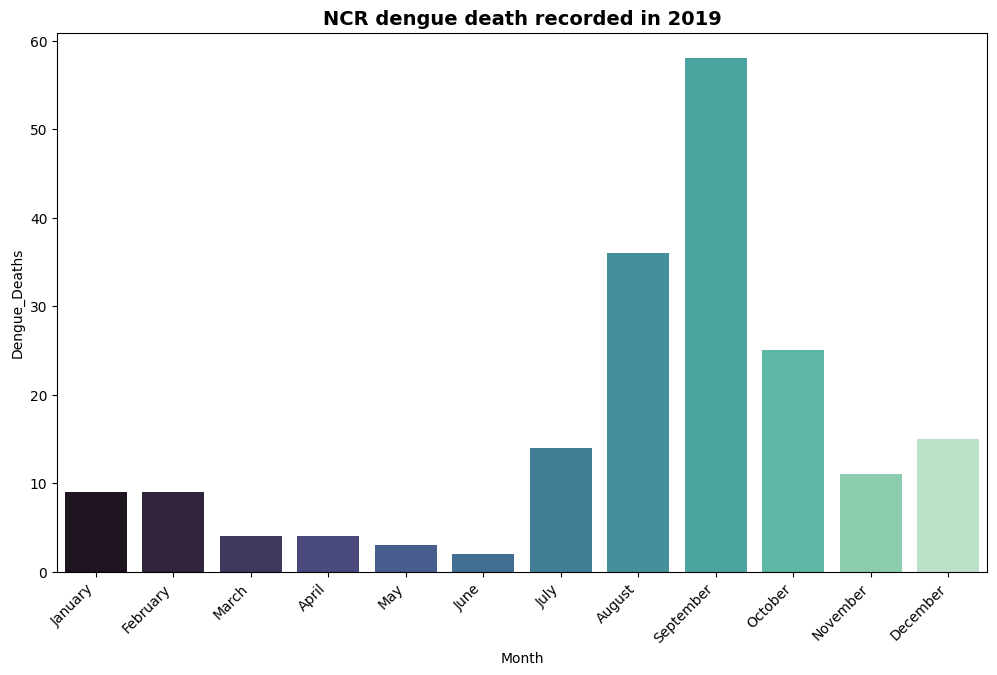

In [119]:
plt.figure(figsize=(12,7))
sns.barplot(
    data=NCR_Death,
    x='Month',
    y='Dengue_Deaths',
    order=month_order,
    palette='mako'
)
plt.xlabel('Month')
plt.ylabel('Dengue_Deaths')
plt.title('NCR dengue death recorded in 2019', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()



<ul>
<h1><b><li>Insights</li></b></h1>

<ol start = 5><li><p> <b>The graph shows that September had the highest number of dengue deaths in NCR for 2019</b>, followed by August and October. This means dengue cases were most serious during the <i>rainy season</i>, when mosquitoes breed more easily.</i>
</li>
<li><b>Months like March, May, and June recorded the fewest deaths</b>, showing that dengue cases were lower during the <b>dry season</b>. This suggests that <i>stronger prevention and cleanup efforts</i> should be done before and during the rainy months.
</li>
</ol>
</p>

In [120]:
R_IV_A_dengue = dengue_ph[dengue_ph['Region'] == 'Region IV-A']

In [121]:
R_IV_A_dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
180,January,2016,Region IV-A,2993,14,0.467758
181,February,2016,Region IV-A,2035,5,0.245700
182,March,2016,Region IV-A,1327,9,0.678222
183,April,2016,Region IV-A,838,1,0.119332
184,May,2016,Region IV-A,714,1,0.140056
185,June,2016,Region IV-A,778,4,0.514139
186,July,2016,Region IV-A,2270,6,0.264317
187,August,2016,Region IV-A,3218,2,0.062150
188,September,2016,Region IV-A,3454,28,0.810654
189,October,2016,Region IV-A,3175,20,0.629921


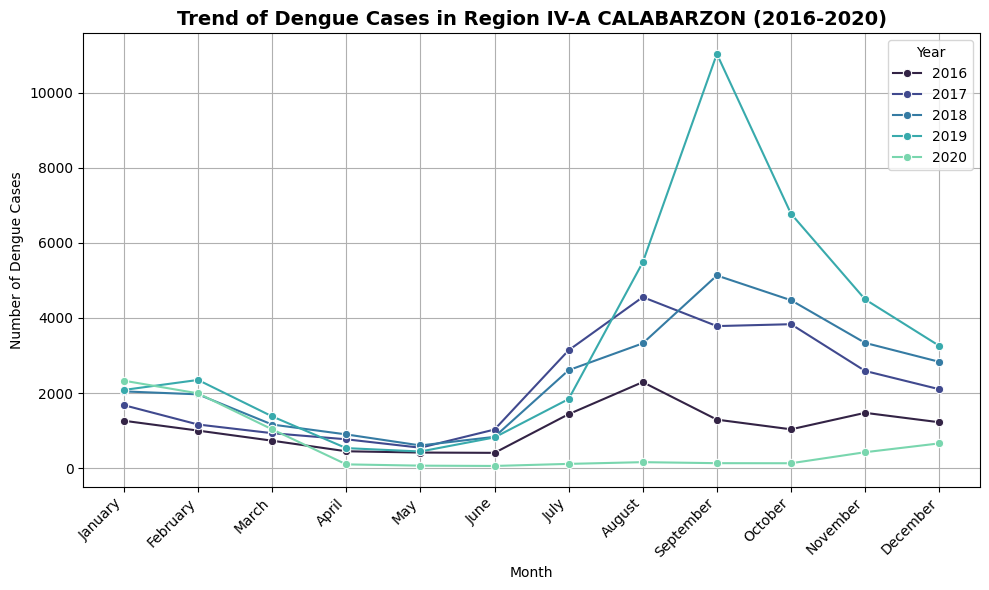

In [122]:
R_IV_A_dengue['Month'] = pd.Categorical(R_IV_A_dengue['Month'], categories = month_order, ordered = True)

plt.figure(figsize=(10,6))
sns.lineplot(x = 'Month', y = 'Dengue_Cases', hue = 'Year', data = NCR_dengue, marker ='o',palette="mako")
plt.title('Trend of Dengue Cases in Region IV-A CALABARZON (2016-2020)', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Dengue Cases')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

<ul>
<h1><b><li>Insights</li></b></h1>

<ol start = 7><li><p> The graph shows the <b>trend of dengue cases in Region IV-A from 2016 to 2020</b>, where <b>2019 had the highest number of cases</b>, peaking sharply in <b>September</b>. This suggests that dengue outbreaks were most severe during the <b>rainy months</b>, when mosquito breeding increases.</i>
</li>
<li> In <b>2020</b>, dengue cases were <b>much lower</b> compared to previous years, possibly due to <b>pandemic restrictions</b> that reduced outdoor movement and exposure to mosquitoes. This shows how changes in human activity can affect the spread of dengue.</li>
</ol>
</p>


In [123]:
CALABARZON_2020 = R_IV_A_dengue[(R_IV_A_dengue['Region'] == 'Region IV-A') & (R_IV_A_dengue['Year'] == 2020)]

CALABARZON_Death = CALABARZON_2020.groupby(['Month'])[['Dengue_Deaths', 'Dengue_Cases']].sum().reset_index()

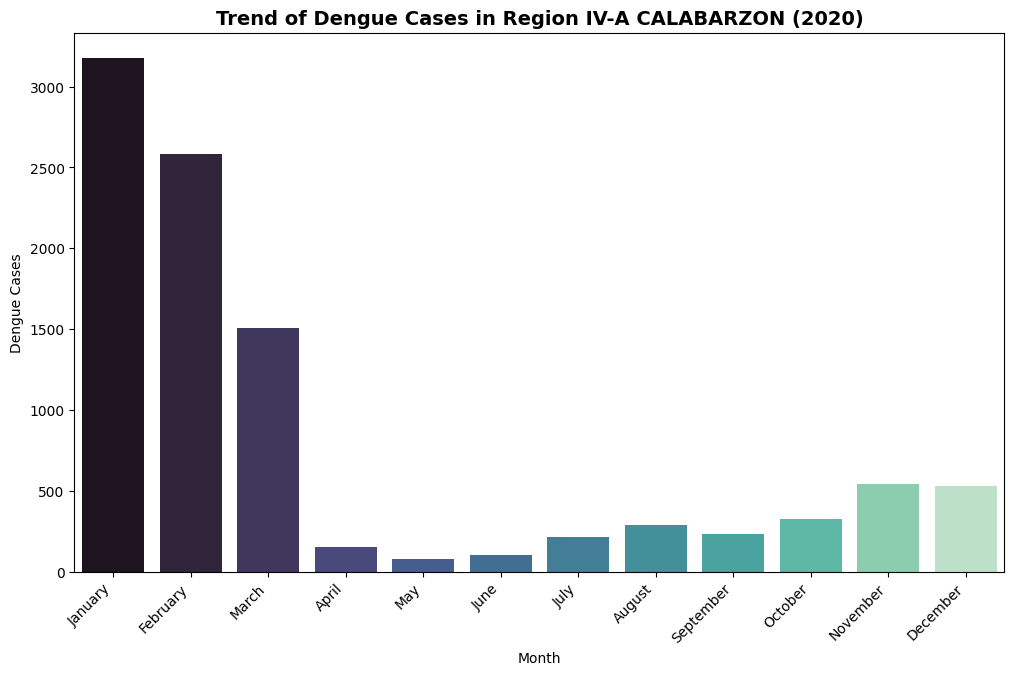

In [124]:
plt.figure(figsize=(12,7))
sns.barplot(
    data=CALABARZON_Death,
    x='Month',
    y='Dengue_Cases',
    palette='mako',
    errorbar=None
)

plt.xlabel('Month')
plt.ylabel('Dengue Cases')
plt.title('Trend of Dengue Cases in Region IV-A CALABARZON (2020)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.show()

<ul>
<h1><b><li>Insights</li></b></h1>

<ol start = 9><li><p> The graph shows that <b>January and February had the highest dengue cases</b> in Region IV-A CALABARZON in 2020. After February, the number of cases <b>dropped sharply</b> and stayed low for the next few months.</i>
</li>
<li> Starting from <b>July to December</b>, dengue cases began to <b>slightly increase again</b>, but they <b>did not reach the early-year levels</b>, showing that dengue spread was more controlled in the latter part of the year.</li>
</ol>
</p>
